In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df['target']= iris.target
df['flower_name']= df.target.apply(lambda x: iris.target_names[x])

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [16]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [17]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

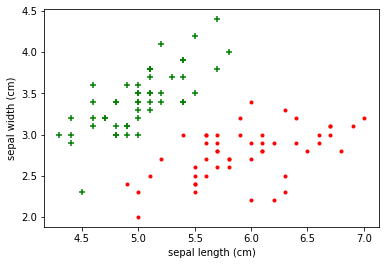

In [20]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='.')

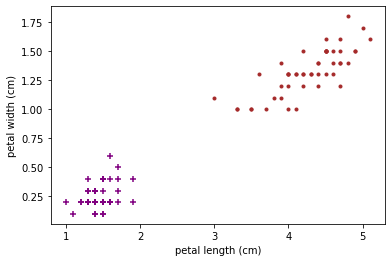

In [23]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='purple',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='brown',marker='.')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x = df.drop(['target','flower_name'],1)
y = df.target

C:\Users\DELL\AppData\Local\Temp\ipykernel_5644\1253482523.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop(['target','flower_name'],1)


In [27]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) 

In [30]:
len(x_train)

120

In [31]:
len(x_test)

30

In [35]:
from sklearn.svm import SVC
model= SVC()

In [36]:
model.fit(x_train,y_train)
# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
#   max_iter=-1, probability=False, random_state=None, shrinking=True,
#   tol=0.001, verbose=False)

SVC()

In [38]:
model.score(x_test, y_test)


0.9666666666666667

In [40]:
model.predict([[4.7,3.2,1.3,0.2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [41]:
model.predict([[6.4,3.2,4.5,1.5]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

#  Parameters

* kernel : what type of hyperplane to fit.
* C(Regularization parameter) : It tells us how much misclassification we want to avoid. – Hard margin SVM generally has large   values of C. – Soft margin SVM generally has small values of C.
* gamma(Kernal coefficient): for non linear kernel, higer gamma value tries to excatly fit the data
* degree: for poly kernel


###  Tune Parameter:

####  Regularization(C)

In [145]:
# svc= SVC(kernel='linear',C=1).fit(x,y)
# rbf_svc = SVC(kernel='rbf',gamma=0.7,C=1).fit(x,y)
# poly_svc = SVC(kernel='poly',degree=3,C=1).fit(x,y)

In [146]:
model = SVC(C=1)

In [147]:
model.fit(x_train,y_train)

SVC(C=1)

In [148]:
model.score(x_test,y_test)

0.9666666666666667

In [173]:
model = SVC(C=0.1)

In [174]:
model.fit(x_train,y_train)

SVC(C=0.1)

In [175]:
model.score(x_test,y_test)

0.8666666666666667

#####  As Regularization decreses accuracy of the model also decreses.

###  Gamma:

In [209]:
model = SVC(C=1,gamma=5)

In [210]:
model.fit(x_train,y_train)

SVC(C=1, gamma=5)

In [211]:
model.score(x_test,y_test)

0.9666666666666667

#####  As gamma increases model performance decreases.

###  Kernel:

In [201]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train, y_train)

SVC(kernel='linear')

In [203]:
model_linear_kernal.score(x_test, y_test)

1.0

In [47]:
from sklearn.model_selection import GridSearchCV


In [205]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
grid.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.933 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.933 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.933 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.933 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.933 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.867 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [187]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.1)
